In [54]:
import os
import numpy as np
import pandas as pd

In [55]:
#  Get the data

In [56]:
column_names=['user_id','item_id','ratings','time_spent']
data=pd.read_csv(r"E:\Data science materials\Real_world_projects\Recommendation'\u.data",sep='\t',names=column_names)


In [57]:
data.head()

,user_id,item_id,ratings,time_spent
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [58]:
movie_titles=pd.read_csv(r"E:\Data science materials\Real_world_projects\Recommendation'\Movie_Id_Titles")

In [59]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [60]:
# we can merge them together
df=pd.merge(data,movie_titles,on='item_id')

In [61]:
df.head()

,user_id,item_id,ratings,time_spent,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
# create a datafram with avg ratings and no. of rastings
df.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: ratings, dtype: float64

In [65]:
df.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

In [66]:
ratings=pd.DataFrame(df.groupby('title')['ratings'].mean())

In [67]:
ratings.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [68]:
ratings['no.of ratings']=df.groupby('title')['ratings'].count()

In [69]:
ratings.head()

,ratings,no.of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [ ]:
# plotting some histograms

<AxesSubplot:>

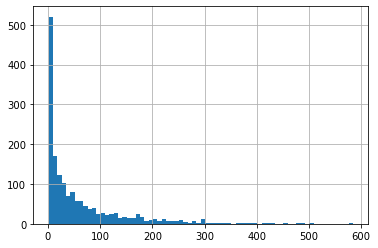

In [71]:
ratings['no.of ratings'].hist(bins=70)

<AxesSubplot:>

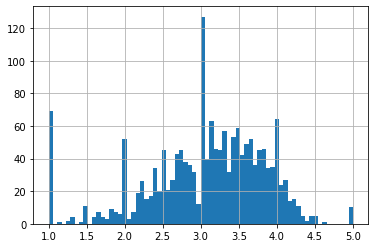

In [72]:
ratings['ratings'].hist(bins=70)

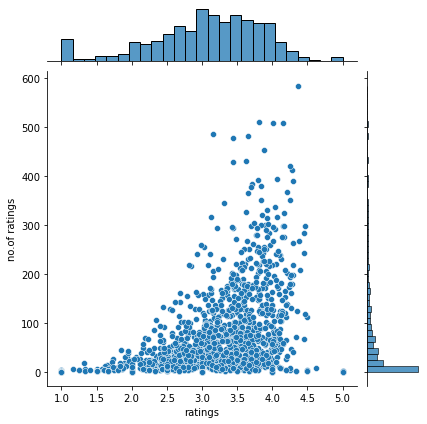

In [75]:
sns.jointplot(x='ratings',y='no.of ratings',data=ratings)

# Recommending similar movies

In [76]:
# Let's create a pivot table , where index will be user id , column will be movie title and values will be ratings.

In [77]:
movie_mat=df.pivot_table(index='user_id',columns='title',values='ratings')

In [78]:
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie

In [79]:
ratings.sort_values('no.of ratings',ascending=False).head(10)

,ratings,no.of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [83]:
star_wars_rating=movie_mat['Star Wars (1977)']
Fargo_ratings=movie_mat['Fargo (1996)']
star_wars_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [84]:
similar_to_starwars=movie_mat.corrwith(star_wars_rating)
similar_to_fargo=movie_mat.corrwith(Fargo_ratings)

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [85]:
corr_star_wars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_star_wars.dropna(inplace=True)
corr_star_wars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [87]:
corr_star_wars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


Let's fix this by filtering the movies which has more than 100 reviews as we seen earlier in the histogram.

In [89]:
corr_star_wars=corr_star_wars.join(ratings['no.of ratings'])

In [90]:
corr_star_wars.head()

,Correlation,no.of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now, we will sort the movie which are highly correlated and have more tahn 100 reviews.

In [94]:
corr_star_wars[corr_star_wars['no.of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no.of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


So, if you watch the Star Wars, the next movie you will be recommended to watch is Empire Strikes Back, The (1980).

In [95]:
# same thing we will do for Fargo movie

In [100]:
corr_with_Fargo=pd.DataFrame(similar_to_fargo,columns=['Correlation'])
corr_with_Fargo.dropna(inplace=True)
corr_with_Fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [101]:
corr_with_Fargo=corr_with_Fargo.join(ratings['no.of ratings'])

In [103]:
corr_with_Fargo[corr_with_Fargo['no.of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no.of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
